In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import scipy.io
from scipy.stats import pearsonr
from pymc import Normal,Uniform,InverseGamma,MvNormalCov,MCMC
from pymc.Matplot import plot
import pymc as pm

In [2]:
oxy_data=scipy.io.loadmat('oxy_ts.mat')

The Standard Deviations for Placebo Amygdala (1.9448291803147304) and Placebo L Frontal Sup (1.881435499287153).
The Standard Deviations for Oxytocin Amygdala (4.157893364240837) and Oxytocin L Frontal Sup (1.6481695586975138).


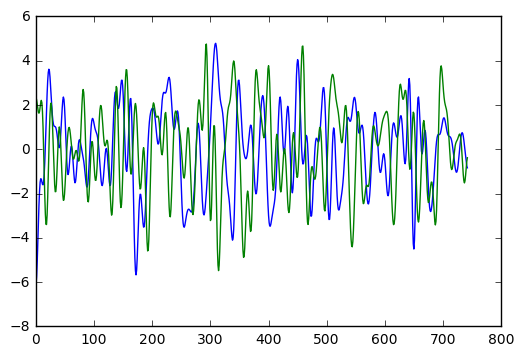

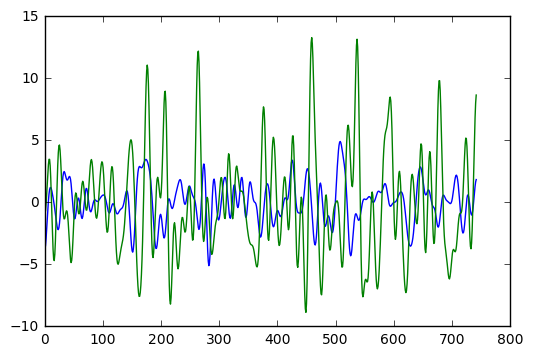

In [3]:
#import fMRI data for Oxytocin and Placebo and the varying brain regions.
sup_oxy=oxy_data['ts_roi_oxytocin'][:,0]
orb_oxy=oxy_data['ts_roi_oxytocin'][:,1]
pos_oxy=oxy_data['ts_roi_oxytocin'][:,2]
amy_oxy=oxy_data['ts_roi_oxytocin'][:,3]
sup_pla=oxy_data['ts_roi_placebo'][:,0]
orb_pla=oxy_data['ts_roi_placebo'][:,1]
pos_pla=oxy_data['ts_roi_placebo'][:,2]
amy_pla=oxy_data['ts_roi_placebo'][:,3]
print("The Standard Deviations for Placebo Amygdala ({}) and Placebo L Frontal Sup ({}).".format(amy_pla.std(),sup_pla.std()))
plt.figure()
plt.plot(sup_pla)
plt.plot(amy_pla)
print("The Standard Deviations for Oxytocin Amygdala ({}) and Oxytocin L Frontal Sup ({}).".format(amy_oxy.std(),sup_oxy.std()))
plt.figure()
plt.plot(sup_oxy)
plt.plot(amy_oxy)

# Example of What Correlated Data Might Look Like
The data below is an example of data that looks more correlated vs less correlated. It should be an ellipse in a diagonal pattern. 

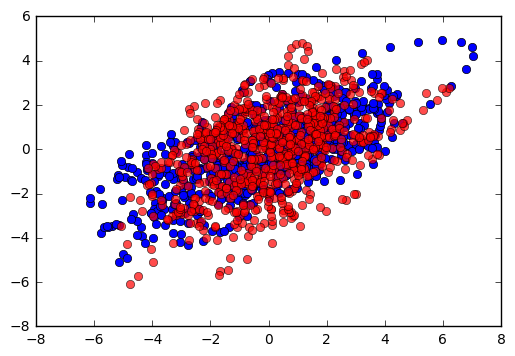

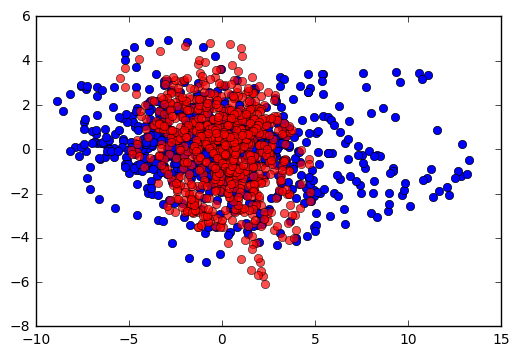

In [4]:
plt.figure(1)
plt.plot(orb_oxy, sup_oxy, 'o')
plt.plot(orb_pla, sup_pla, 'ro',  alpha=0.7)
plt.figure(2)
plt.plot(amy_oxy, sup_oxy, 'o')
plt.plot(amy_pla, sup_pla, 'ro', alpha=0.7)

# Pearson Correlation Using a Bayesian Technique

For the Correlation, we used a technique that was similar to the one used in the provided Oxytocin Notebook. The idea is to calcluate the correlation using bayesian technique
$$\rho_{X,Y} = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{N}(x_{i}-\bar{x})^2}\sqrt{\sum_{i=1}^{N}(y_{i}-\bar{y})^2}}$$

In [67]:
#priors_pla
rho_o_p_pla=Uniform('rho_o_p_pla',-1.0,1.0)
sigma0_o_p_pla=10.0
nu0_o_p_pla=1.0
sig1_o_p_pla=Uniform('sig1_o_p_pla',0,10.0)
sig2_o_p_pla=Uniform('sig2_o_p_pla',0,10.0)
mu1_o_p_pla=Normal('mu1_o_p_pla',0.0,1/sig1_o_p_pla)
mu2_o_p_pla=Normal('mu2_o_p_pla',0.0,1/sig2_o_p_pla)

rho_o_a_pla=Uniform('rho_o_a_pla',-1.0,1.0)
sigma0_o_a_pla=10.0
nu0_o_a_pla=1.0
sig1_o_a_pla=Uniform('sig1_o_a_pla',0,10.0)
sig2_o_a_pla=Uniform('sig2_o_a_pla',0,10.0)
mu1_o_a_pla=Normal('mu1_o_a_pla',0.0,1/sig1_o_a_pla)
mu2_o_a_pla=Normal('mu2_o_a_pla',0.0,1/sig2_o_a_pla)

rho_p_a_pla=Uniform('rho_p_a_pla',-1.0,1.0)
sigma0_p_a_pla=10.0
nu0_p_a_pla=1.0
sig1_p_a_pla=Uniform('sig1_p_a_pla',0,10.0)
sig2_p_a_pla=Uniform('sig2_p_a_pla',0,10.0)
mu1_p_a_pla=Normal('mu1_p_a_pla',0.0,1/sig1_p_a_pla)
mu2_p_a_pla=Normal('mu2_p_a_pla',0.0,1/sig2_p_a_pla)

#priors_oxy
rho_o_p_oxy=Uniform('rho_o_p_oxy',-1.0,1.0)
sigma0_o_p_oxy=10.0
nu0_o_p_oxy=1.0
sig1_o_p_oxy=Uniform('sig1_o_p_oxy',0,10.0)
sig2_o_p_oxy=Uniform('sig2_o_p_oxy',0,10.0)
mu1_o_p_oxy=Normal('mu1_o_p_oxy',0.0,1/sig1_o_p_oxy)
mu2_o_p_oxy=Normal('mu2_o_p_oxy',0.0,1/sig2_o_p_oxy)

rho_o_a_oxy=Uniform('rho_o_a_oxy',-1.0,1.0)
sigma0_o_a_oxy=10.0
nu0_o_a_oxy=1.0
sig1_o_a_oxy=Uniform('sig1_o_a_oxy',0,10.0)
sig2_o_a_oxy=Uniform('sig2_o_a_oxy',0,10.0)
mu1_o_a_oxy=Normal('mu1_o_a_oxy',0.0,1/sig1_o_a_oxy)
mu2_o_a_oxy=Normal('mu2_o_a_oxy',0.0,1/sig2_o_a_oxy)

rho_p_a_oxy=Uniform('rho_p_a_oxy',-1.0,1.0)
sigma0_p_a_oxy=10.0
nu0_p_a_oxy=1.0
sig1_p_a_oxy=Uniform('sig1_p_a_oxy',0,10.0)
sig2_p_a_oxy=Uniform('sig2_p_a_oxy',0,10.0)
mu1_p_a_oxy=Normal('mu1_p_a_oxy',0.0,1/sig1_p_a_oxy)
mu2_p_a_oxy=Normal('mu2_p_a_oxy',0.0,1/sig2_p_a_oxy)

#priors drho
nu0_drho=1.0
gamma0_drho=1.0
mu0_drho=0
sigma0_drho=0.2
delta0_o_p_drho=pm.Normal('delta_o_p_drho',-1,1)
delta0_o_a_drho=pm.Normal('delta_o_a_drho',-1,1)
delta0_p_a_drho=pm.Normal('delta_p_a_drho',-1,1)
tau0_drho=1.0

# Choosing Our Priors:

Rho: this is our "Pearson Correlation coefficient", and rho is going to be between -1 (completely anticorrelated) and 1 (completely correlated).

Sigma: 
Nu: we only used 1 degree of freedom for this model



In [68]:
data_o_p_pla=np.vstack((orb_pla,pos_pla)).T
data_o_p_oxy=np.vstack((orb_oxy,pos_oxy)).T
data_o_a_pla=np.vstack((orb_pla,amy_pla)).T
data_o_a_oxy=np.vstack((orb_oxy,amy_oxy)).T
data_p_a_pla=np.vstack((pos_pla,amy_pla)).T
data_p_a_oxy=np.vstack((pos_oxy,amy_oxy)).T

In [69]:
#likelyhood function
distribution_o_p_pla=MvNormalCov('distribution_o_p_pla',
                      mu=[mu1_o_p_pla,mu2_o_p_pla],
                      C=[[sig1_o_p_pla**2,rho_o_p_pla*sig1_o_p_pla*sig2_o_p_pla],[rho_o_p_pla*sig1_o_p_pla*sig2_o_p_pla,sig2_o_p_pla**2]],
                      value=data_o_p_pla,
                      observed=True)

distribution_o_p_oxy=MvNormalCov('distribution_o_p_oxy',
                      mu=[mu1_o_p_oxy,mu2_o_p_oxy],
                      C=[[sig1_o_p_oxy**2,rho_o_p_oxy*sig1_o_p_oxy*sig2_o_p_oxy],[rho_o_p_oxy*sig1_o_p_oxy*sig2_o_p_oxy,sig2_o_p_oxy**2]],
                      value=data_o_p_oxy,
                      observed=True)

distribution_o_a_pla=MvNormalCov('distribution_o_a_pla',
                      mu=[mu1_o_a_pla,mu2_o_a_pla],
                      C=[[sig1_o_a_pla**2,rho_o_a_pla*sig1_o_a_pla*sig2_o_a_pla],[rho_o_a_pla*sig1_o_a_pla*sig2_o_a_pla,sig2_o_a_pla**2]],
                      value=data_o_a_pla,
                      observed=True)

distribution_o_a_oxy=MvNormalCov('distribution_o_a_oxy',
                      mu=[mu1_o_a_oxy,mu2_o_a_oxy],
                      C=[[sig1_o_a_oxy**2,rho_o_a_oxy*sig1_o_a_oxy*sig2_o_a_oxy],[rho_o_a_oxy*sig1_o_a_oxy*sig2_o_a_oxy,sig2_o_a_oxy**2]],
                      value=data_o_a_oxy,
                      observed=True)

distribution_p_a_pla=MvNormalCov('distribution_p_a_pla',
                      mu=[mu1_p_a_pla,mu2_p_a_pla],
                      C=[[sig1_p_a_pla**2,rho_p_a_pla*sig1_p_a_pla*sig2_p_a_pla],[rho_p_a_pla*sig1_p_a_pla*sig2_p_a_pla,sig2_p_a_pla**2]],
                      value=data_p_a_pla,
                      observed=True)

distribution_p_a_oxy=MvNormalCov('distribution_p_a_oxy',
                      mu=[mu1_p_a_oxy,mu2_p_a_oxy],
                      C=[[sig1_p_a_oxy**2,rho_p_a_oxy*sig1_p_a_oxy*sig2_p_a_oxy],[rho_p_a_oxy*sig1_p_a_oxy*sig2_p_a_oxy,sig2_p_a_oxy**2]],
                      value=data_p_a_oxy,
                      observed=True)

sigmaSquare_o_p_drho=pm.InverseGamma('sigmaSquare',nu0_drho/2.0,nu0_drho*sigma0_drho**2/2.0)
mu_o_p_drho=pm.Normal('mu',mu=mu0_drho,tau=1/gamma0_drho**2)
delta_o_p_drho=pm.Normal('delta',mu=delta0_o_p_drho,tau=1/tau0_drho**2)

sigmaSquare_o_a_drho=pm.InverseGamma('sigmaSquare',nu0_drho/2.0,nu0_drho*sigma0_drho**2/2.0)
mu_o_a_drho=pm.Normal('mu',mu=mu0_drho,tau=1/gamma0_drho**2)
delta_o_a_drho=pm.Normal('delta',mu=delta0_o_a_drho,tau=1/tau0_drho**2)

sigmaSquare_p_a_drho=pm.InverseGamma('sigmaSquare',nu0_drho/2.0,nu0_drho*sigma0_drho**2/2.0)
mu_p_a_drho=pm.Normal('mu',mu=mu0_drho,tau=1/gamma0_drho**2)
delta_p_a_drho=pm.Normal('delta',mu=delta0_p_a_drho,tau=1/tau0_drho**2)

s1_o_p=pm.Normal('s1_o_P',mu=mu_o_p_drho+delta_o_p_drho,tau=1/sigmaSquare_o_p_drho,value=rho_o_p_oxy,observed=True)
s2_o_p=pm.Normal('s2_o_p',mu=mu_o_p_drho-delta_o_p_drho,tau=1/sigmaSquare_o_p_drho,value=rho_o_p_pla,observed=True)

s1_o_a=pm.Normal('s1_o_a',mu=mu_o_a_drho+delta_o_a_drho,tau=1/sigmaSquare_o_a_drho,value=rho_o_a_oxy,observed=True)
s2_o_a=pm.Normal('s2_o_a',mu=mu_o_a_drho-delta_o_a_drho,tau=1/sigmaSquare_o_a_drho,value=rho_o_a_pla,observed=True)

s1_p_a=pm.Normal('s1_p_a',mu=mu_p_a_drho+delta_p_a_drho,tau=1/sigmaSquare_p_a_drho,value=rho_p_a_oxy,observed=True)
s2_p_a=pm.Normal('s2_p_a',mu=mu_p_a_drho-delta_p_a_drho,tau=1/sigmaSquare_p_a_drho,value=rho_p_a_pla,observed=True)


In [70]:
m_o_p_pla=MCMC([[rho_o_p_pla,sig1_o_p_pla,sig2_o_p_pla,mu1_o_p_pla,mu2_o_p_pla,distribution_o_p_pla],
                [rho_o_p_oxy,sig1_o_p_oxy,sig2_o_p_oxy,mu1_o_p_oxy,mu2_o_p_oxy,distribution_o_p_oxy],
                [sigmaSquare_o_p_drho,mu_o_p_drho,delta_o_p_drho,s1_o_p,s2_o_p]])

m_o_a_pla=MCMC([[rho_o_a_pla,sig1_o_a_pla,sig2_o_a_pla,mu1_o_a_pla,mu2_o_a_pla,distribution_o_a_pla],
                [rho_o_a_oxy,sig1_o_a_oxy,sig2_o_a_oxy,mu1_o_a_oxy,mu2_o_a_oxy,distribution_o_a_oxy],
                [sigmaSquare_o_a_drho,mu_o_a_drho,delta_o_a_drho,s1_o_a,s2_o_a]])

m_p_a_pla=MCMC([[rho_p_a_pla,sig1_p_a_pla,sig2_p_a_pla,mu1_p_a_pla,mu2_p_a_pla,distribution_p_a_pla],
                [rho_p_a_oxy,sig1_p_a_oxy,sig2_p_a_oxy,mu1_p_a_oxy,mu2_p_a_oxy,distribution_p_a_oxy],
                [sigmaSquare_p_a_drho,mu_p_a_drho,delta_p_a_drho,s1_p_a,s2_p_a]])

In [71]:
m_o_p_pla.sample(iter=2000,burn=100,thin=10)
m_o_a_pla.sample(iter=2000,burn=100,thin=10)
m_p_a_pla.sample(iter=2000,burn=100,thin=10)

 [-----------------100%-----------------] 2000 of 2000 complete in 60.4 sec

In [72]:
m_o_p_pla.summary()


rho_o_p_pla:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.353            0.032            0.003            [ 0.291  0.408]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.291            0.331           0.352          0.375         0.411
	

mu2_o_p_oxy:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.001            0.114            0.011            [-0.19   0.225]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.19            -0.074          0.001          0.069         0.232
	

sig1_o_p_pla:
 
	Mean             SD               MC Error        95% HPD interval
	--

/Users/caizhihao/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [73]:
m_o_a_pla.summary()


rho_o_a_oxy:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.222           0.039            0.004            [-0.29  -0.149]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.296           -0.246          -0.227         -0.189        -0.149
	

delta:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.14             0.225            0.019            [-0.254  0.725]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-0.37            0.04            0.169          0.236         0.65
	

mu1_o_a_pla:
 
	Mean             SD               MC Error        95% HPD interval
	---------

/Users/caizhihao/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [74]:
m_p_a_pla.summary()


sig2_p_a_oxy:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4.179            0.111            0.01             [ 3.969  4.374]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	3.98             4.083           4.184          4.254         4.398
	

sig1_p_a_oxy:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	2.996            0.082            0.008            [ 2.841  3.148]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	2.86             2.935           2.992          3.046         3.181
	

sigmaSquare:
 
	Mean             SD               MC Error        95% HPD interval
	-

/Users/caizhihao/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Plotting rho_o_p_pla
Plotting mu2_o_p_oxy
Plotting sig1_o_p_pla
Plotting rho_o_p_oxy
Plotting mu1_o_p_pla
Plotting sig2_o_p_oxy
Plotting sig1_o_p_oxy
Plotting mu
Plotting mu2_o_p_pla
Plotting delta
Plotting mu1_o_p_oxy
Plotting sigmaSquare
Plotting sig2_o_p_pla


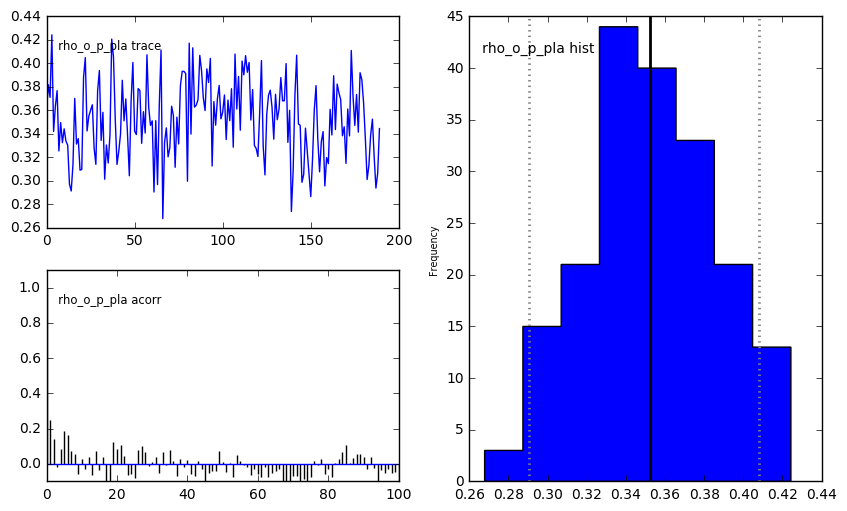

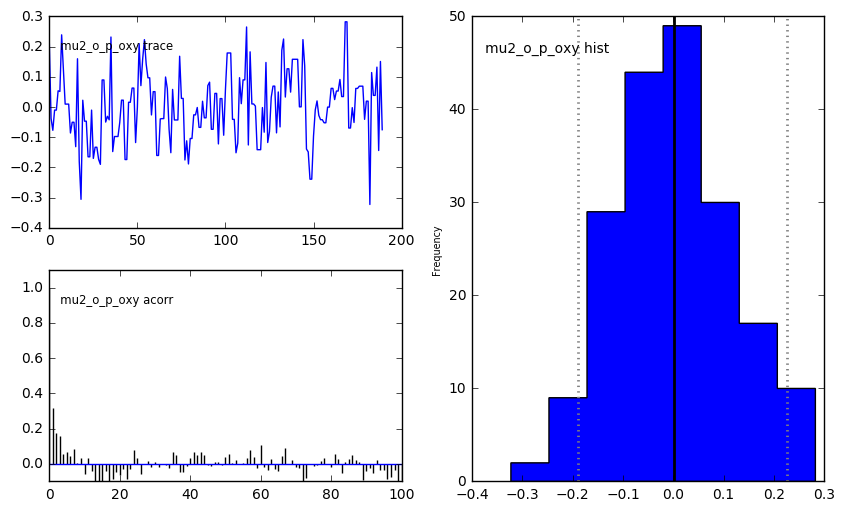

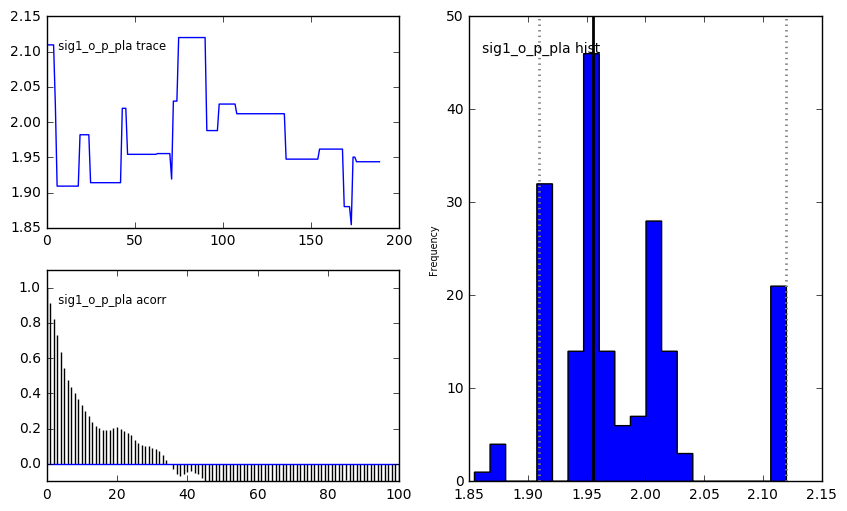

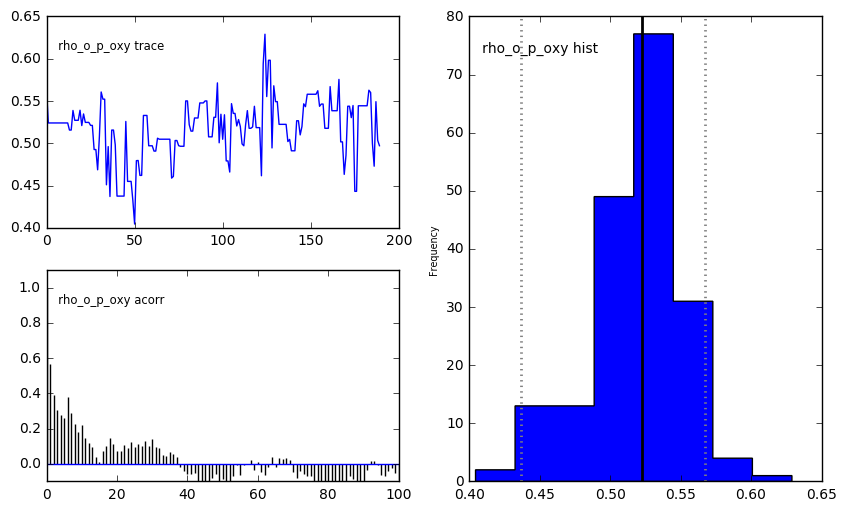

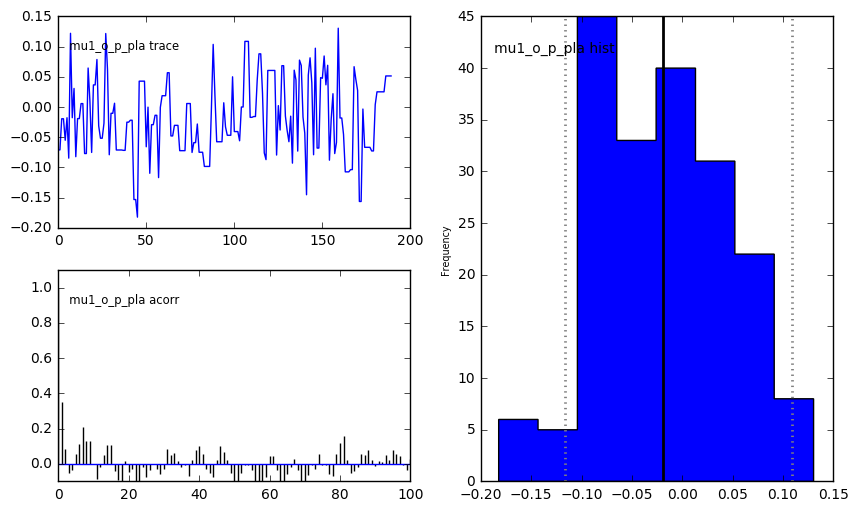

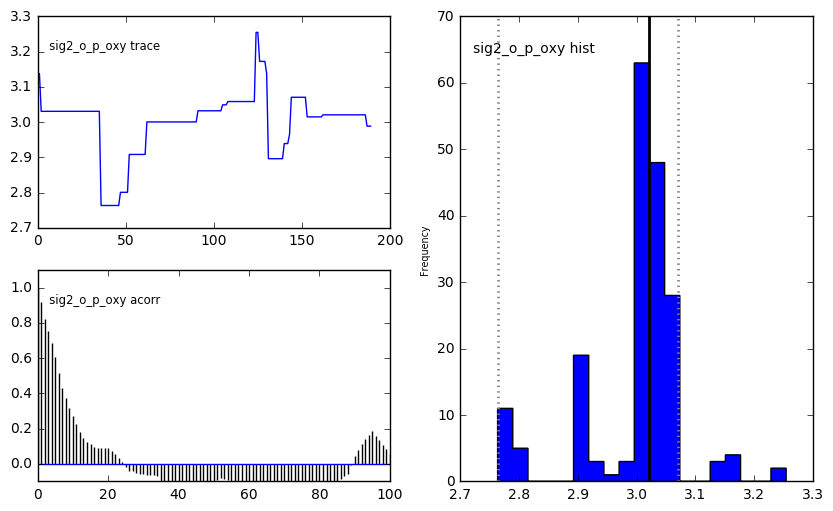

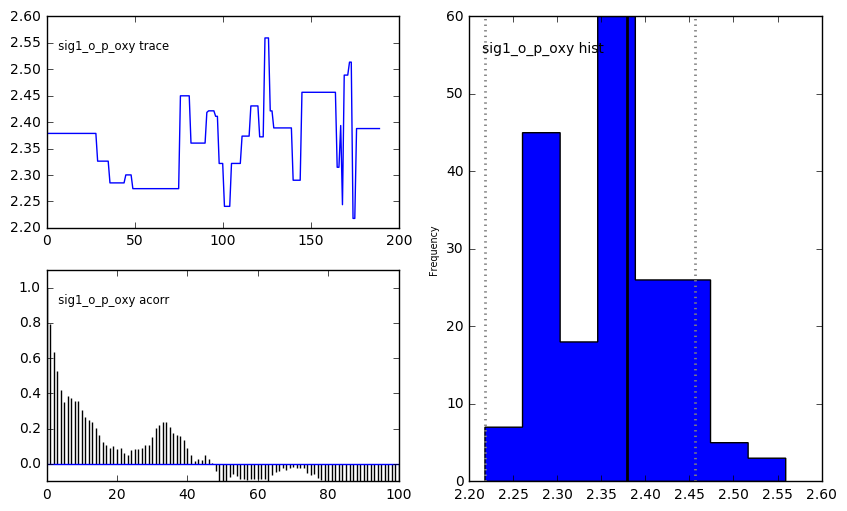

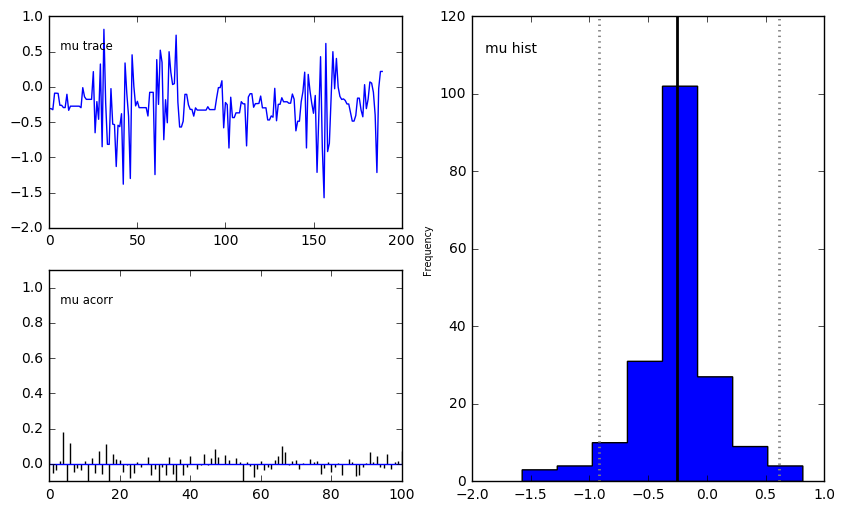

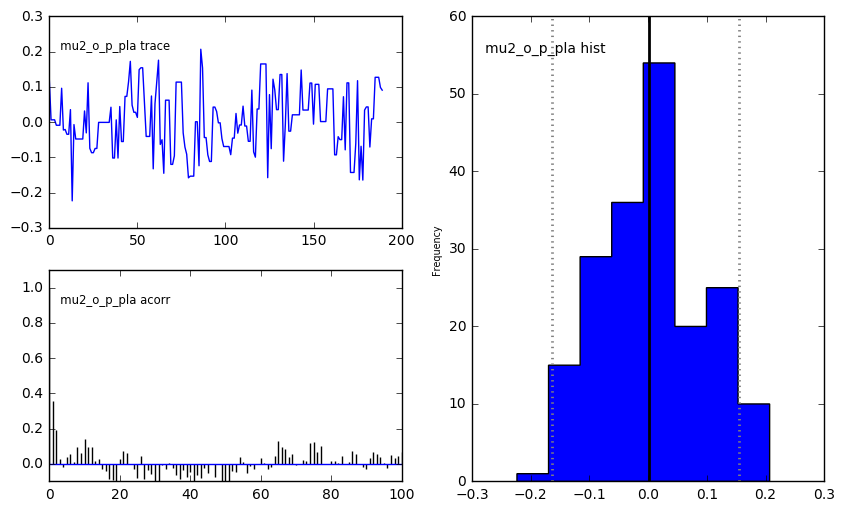

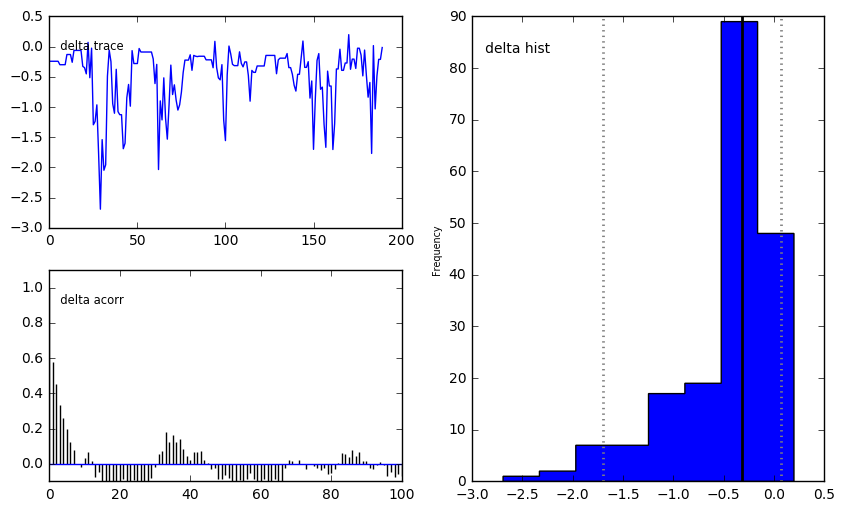

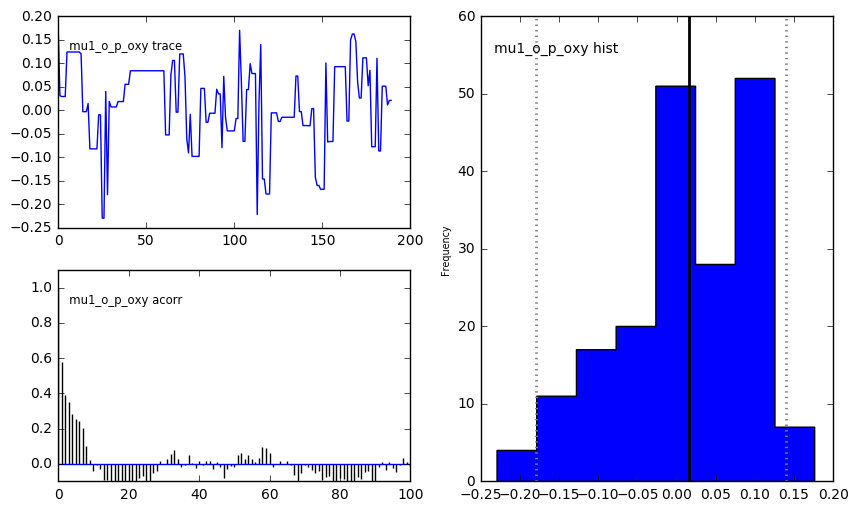

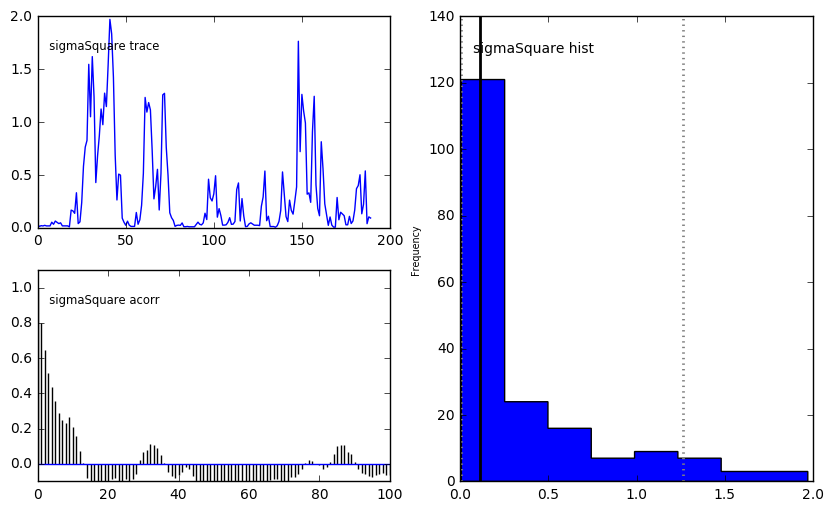

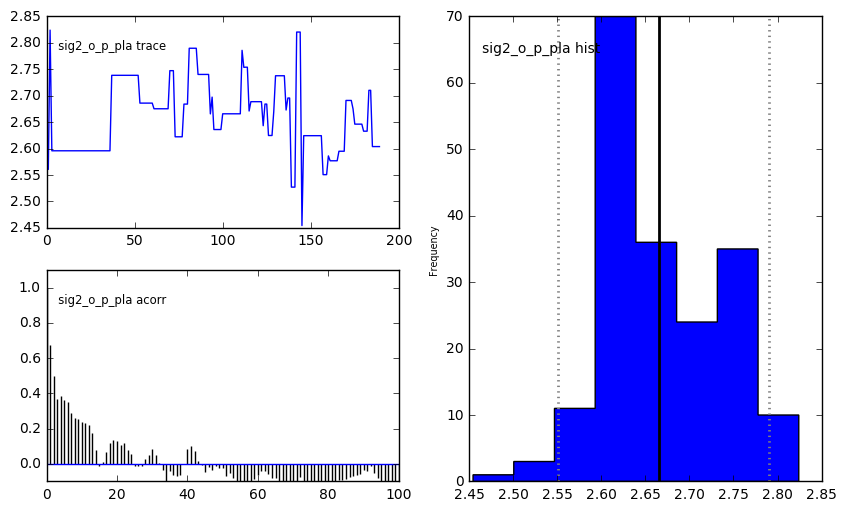

In [75]:
plot(m_o_p_pla)

Plotting rho_o_a_oxy
Plotting delta
Plotting mu1_o_a_pla
Plotting sig2_o_a_oxy
Plotting sig2_o_a_pla
Plotting sig1_o_a_oxy
Plotting mu2_o_a_pla
Plotting mu1_o_a_oxy
Plotting rho_o_a_pla
Plotting sig1_o_a_pla
Plotting sigmaSquare
Plotting mu2_o_a_oxy
Plotting mu


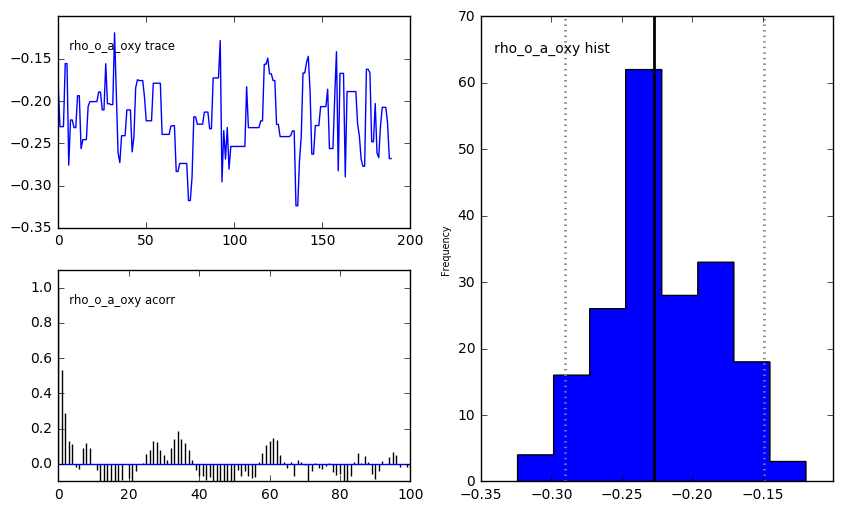

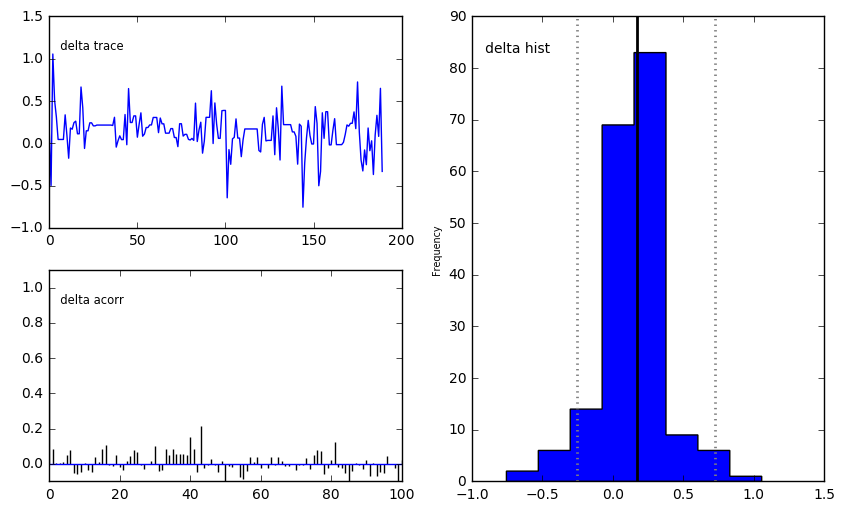

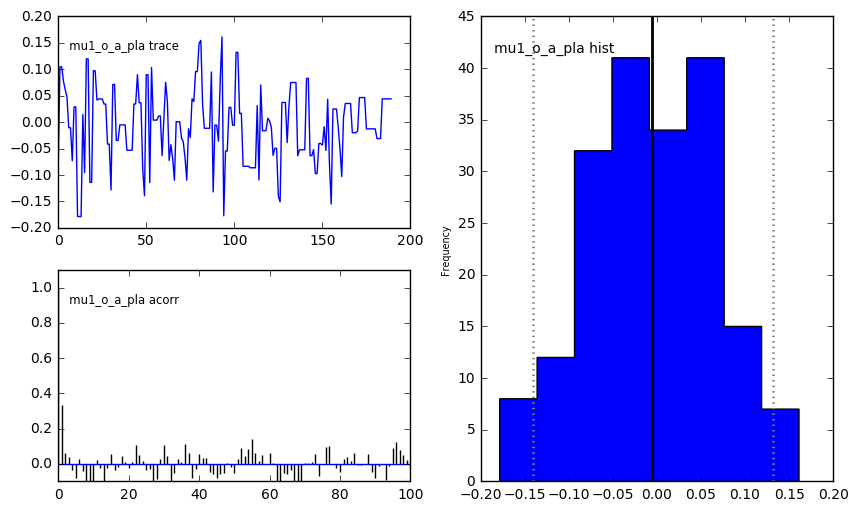

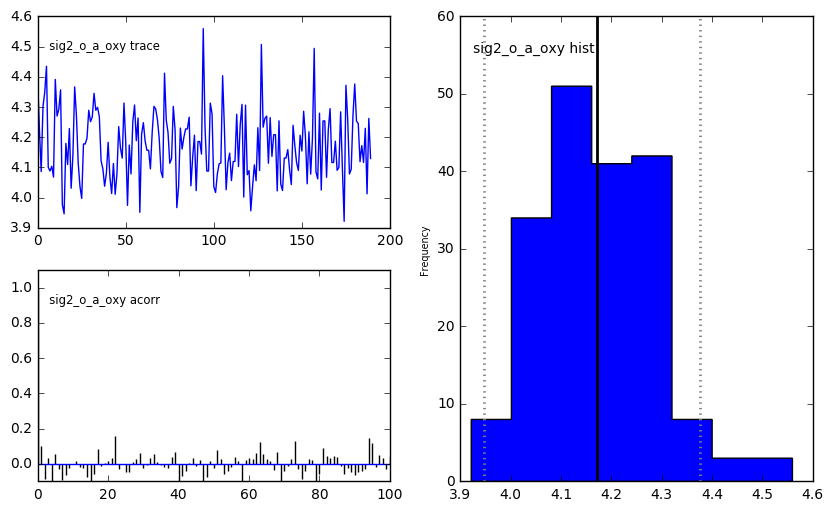

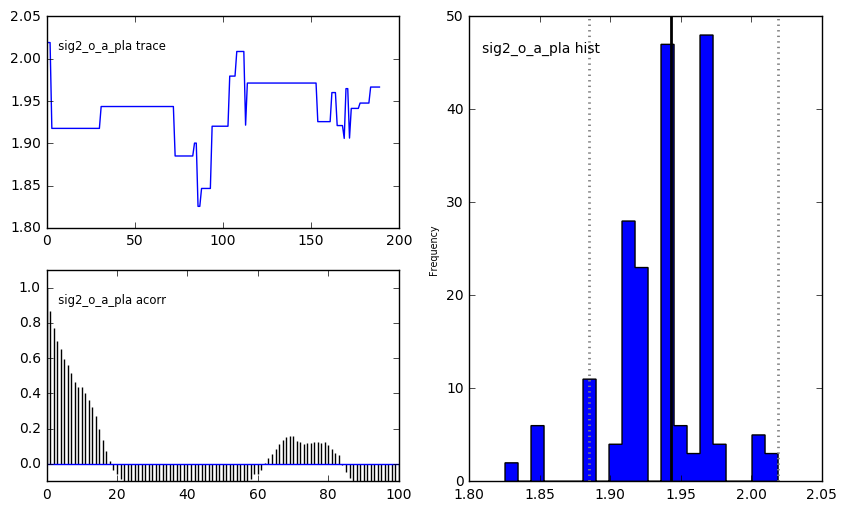

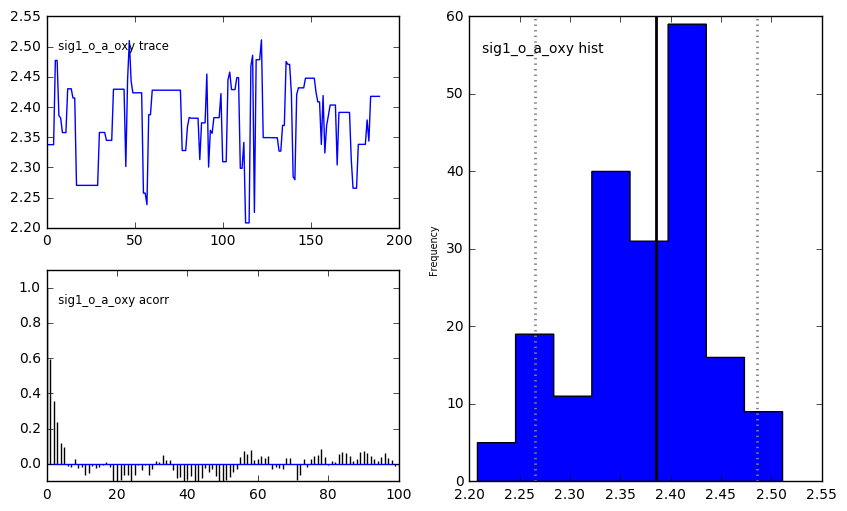

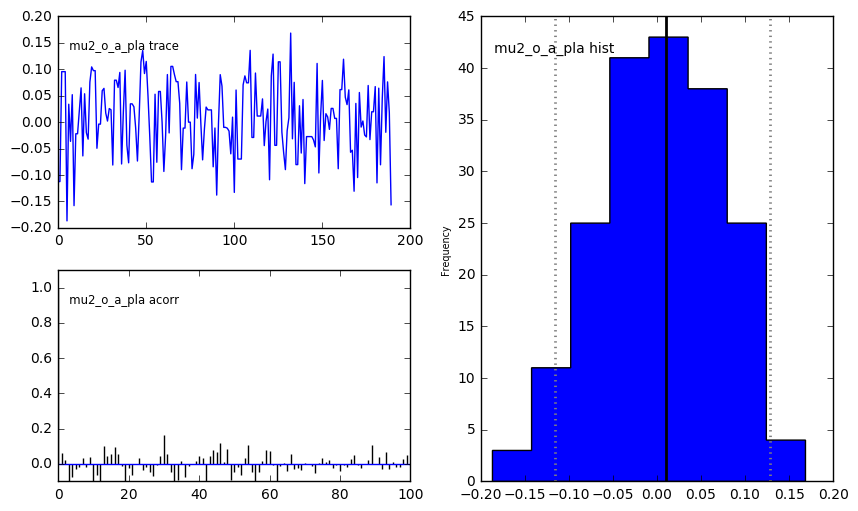

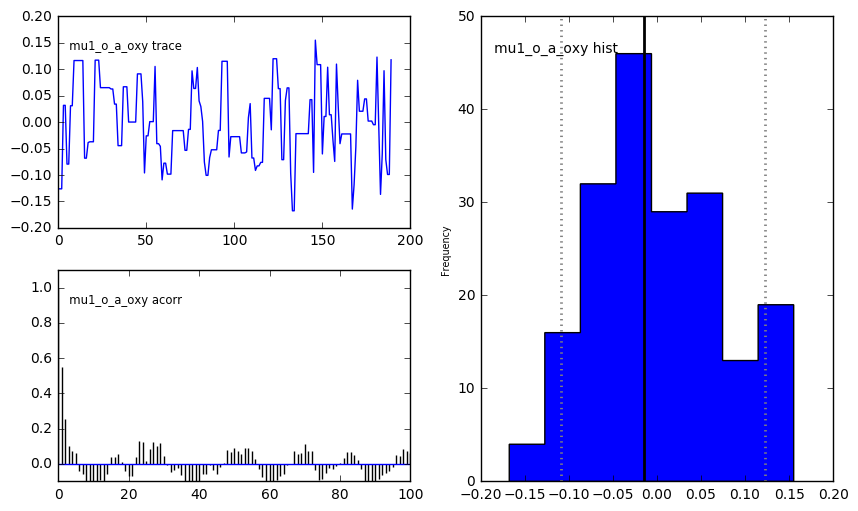

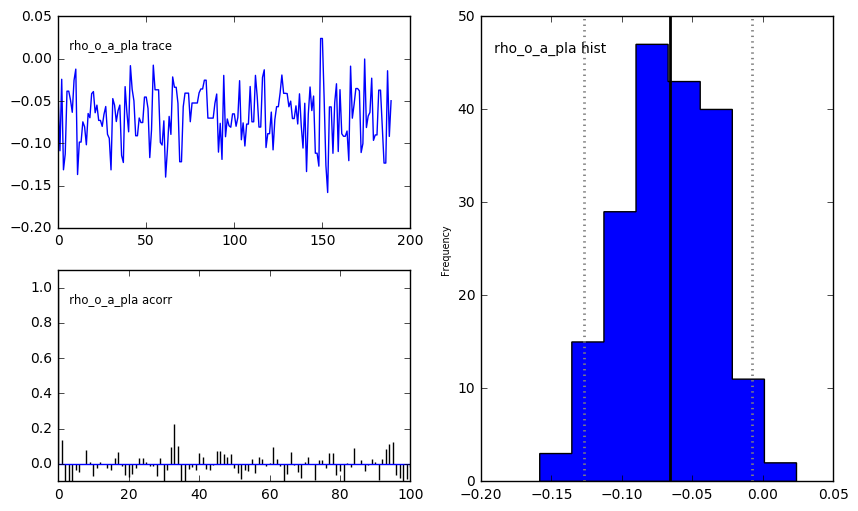

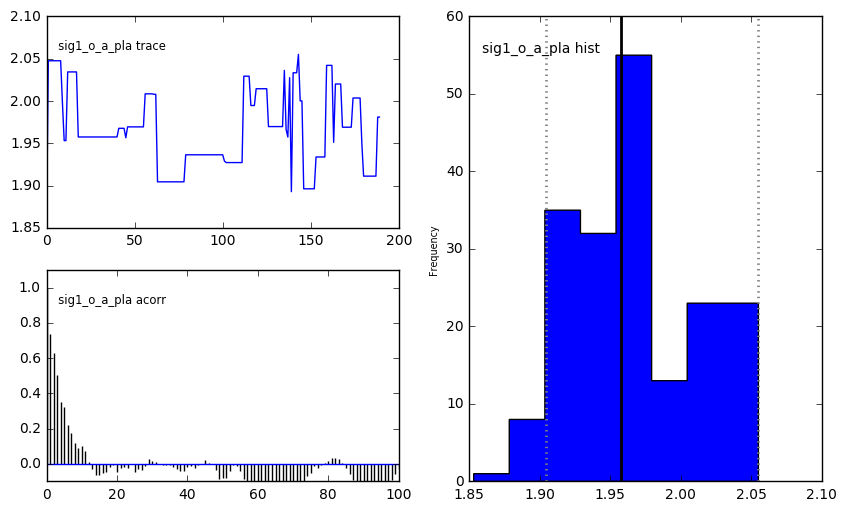

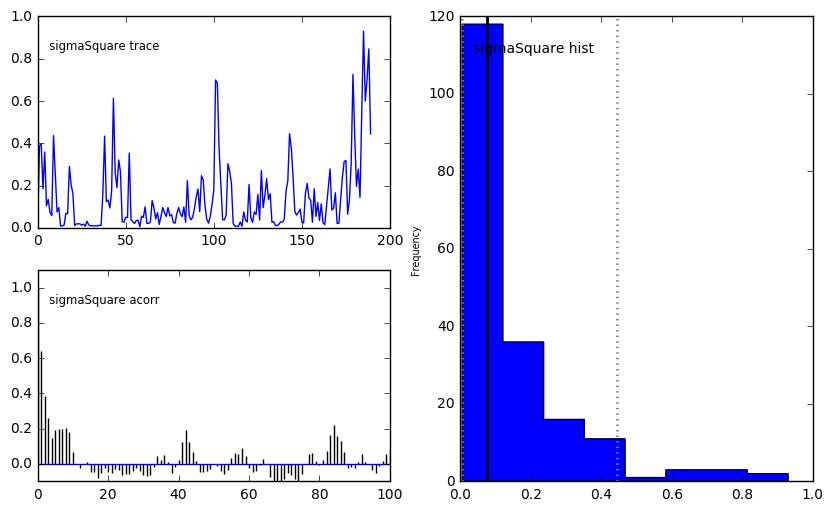

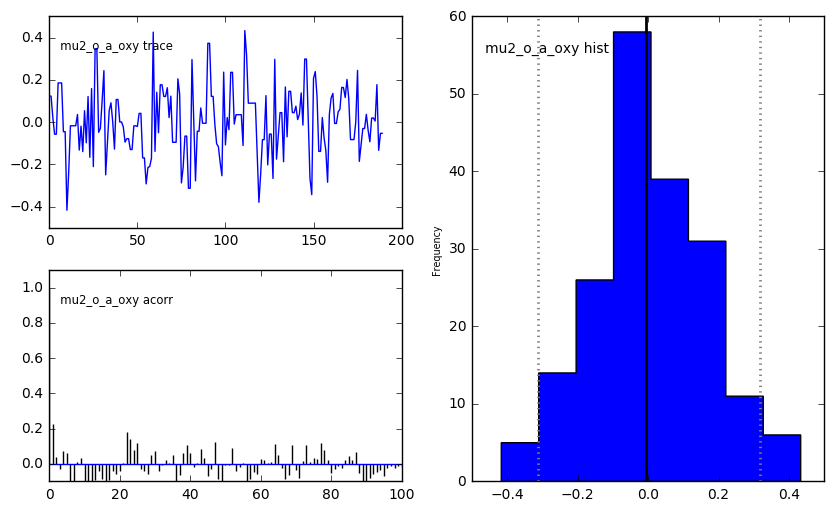

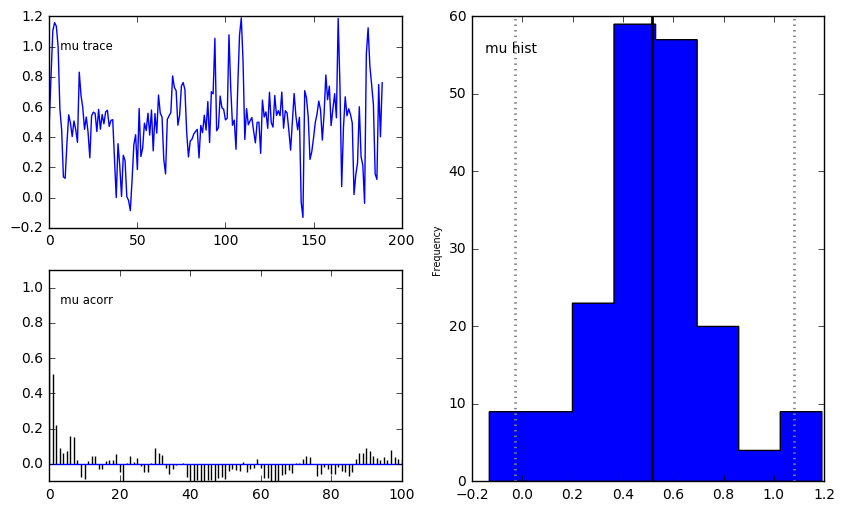

In [76]:
plot(m_o_a_pla)

Plotting sig2_p_a_oxy
Plotting sig1_p_a_oxy
Plotting sigmaSquare
Plotting mu1_p_a_pla
Plotting mu
Plotting mu1_p_a_oxy
Plotting mu2_p_a_pla
Plotting rho_p_a_pla
Plotting delta
Plotting sig2_p_a_pla
Plotting mu2_p_a_oxy
Plotting sig1_p_a_pla
Plotting rho_p_a_oxy


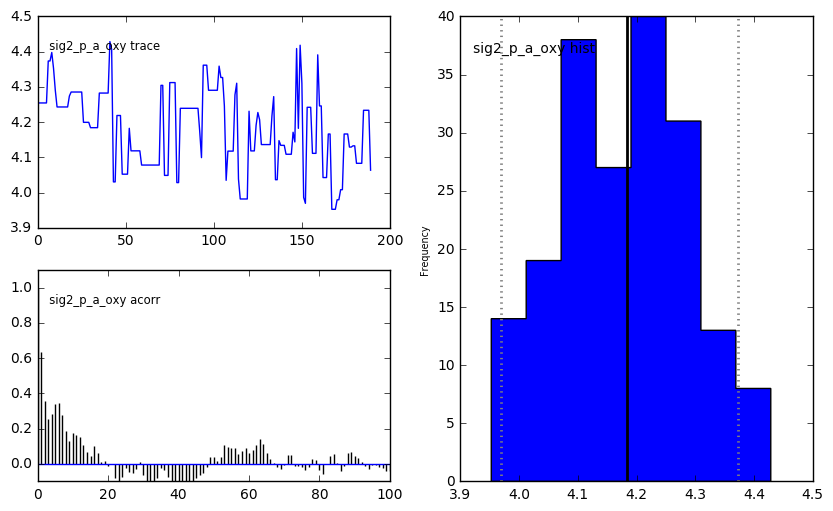

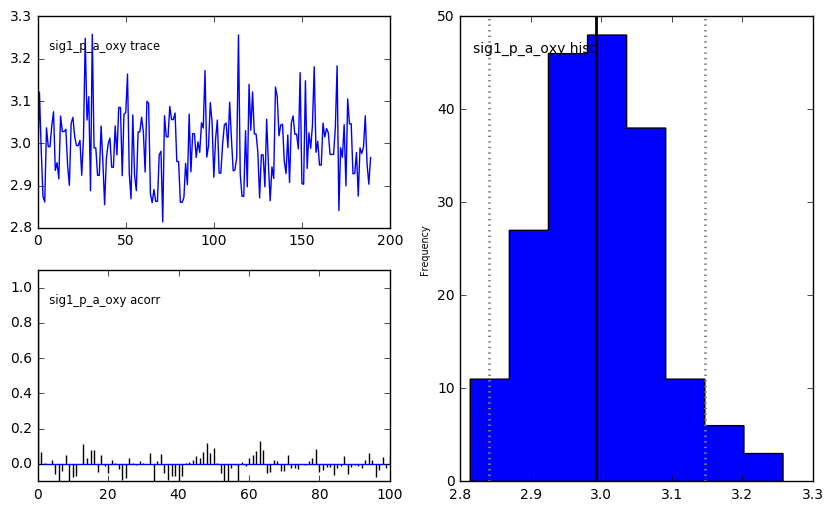

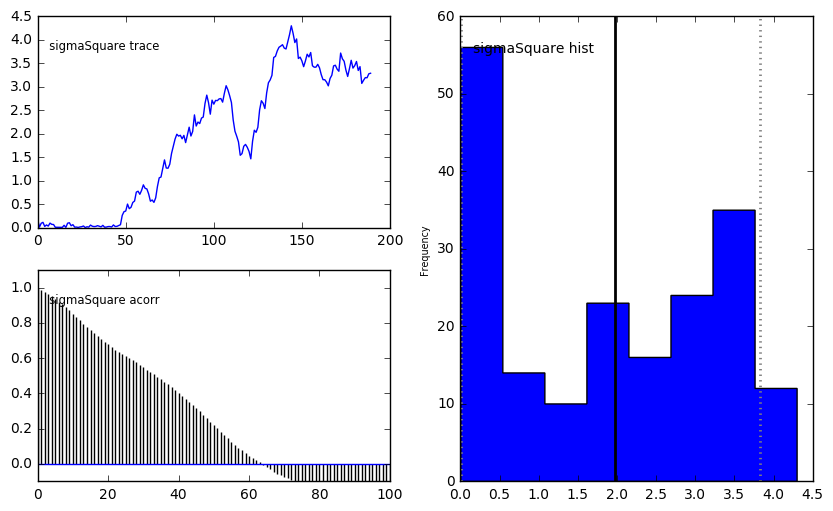

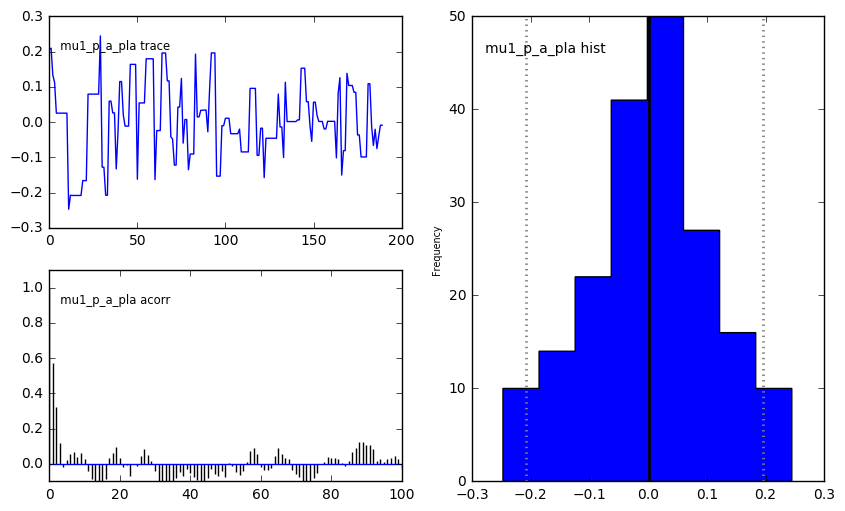

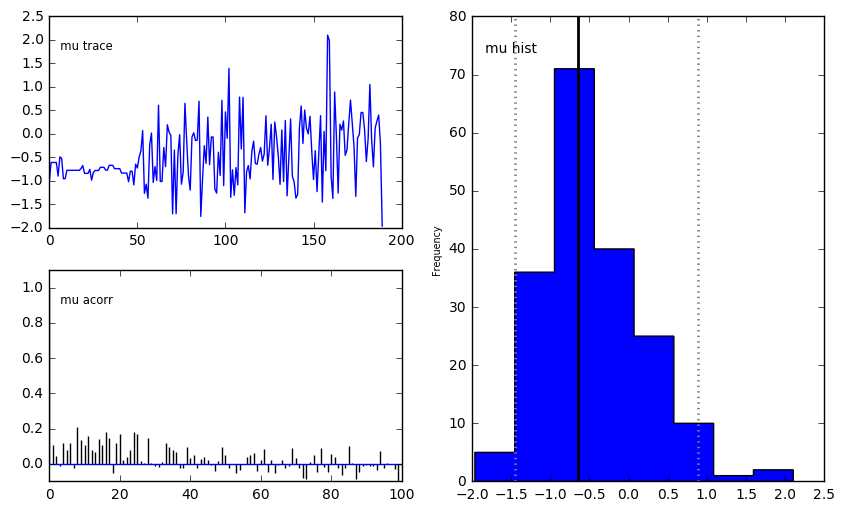

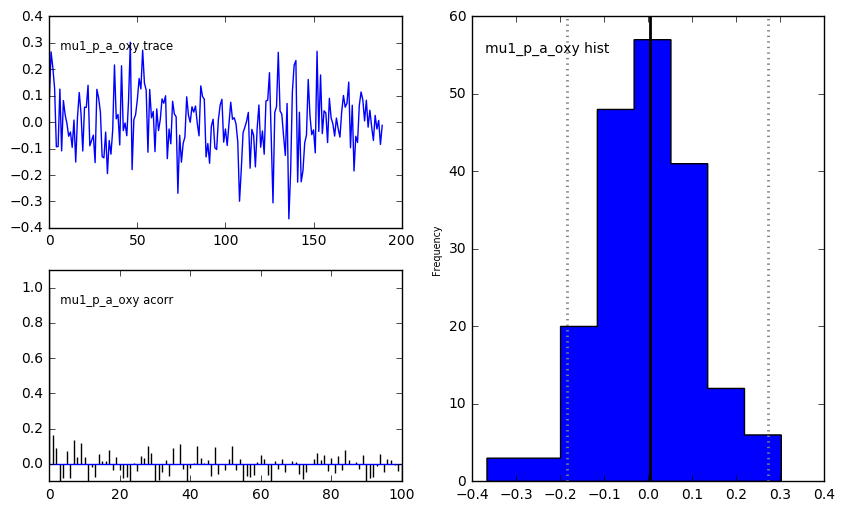

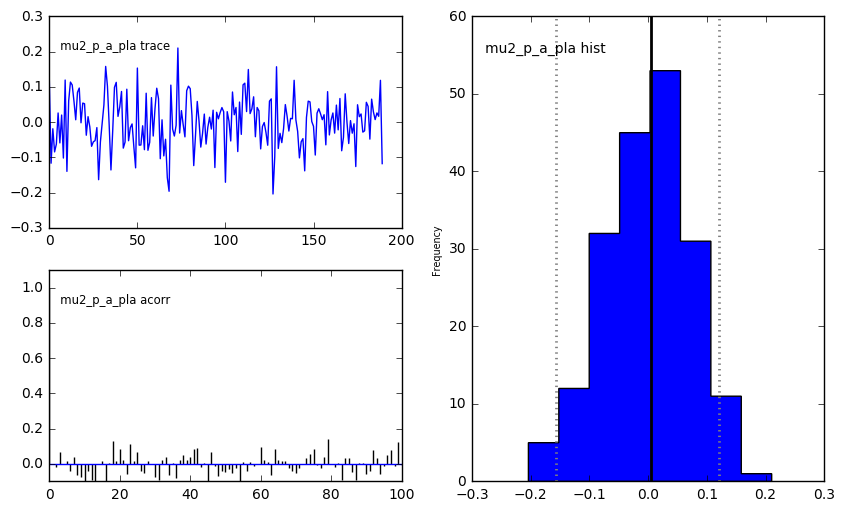

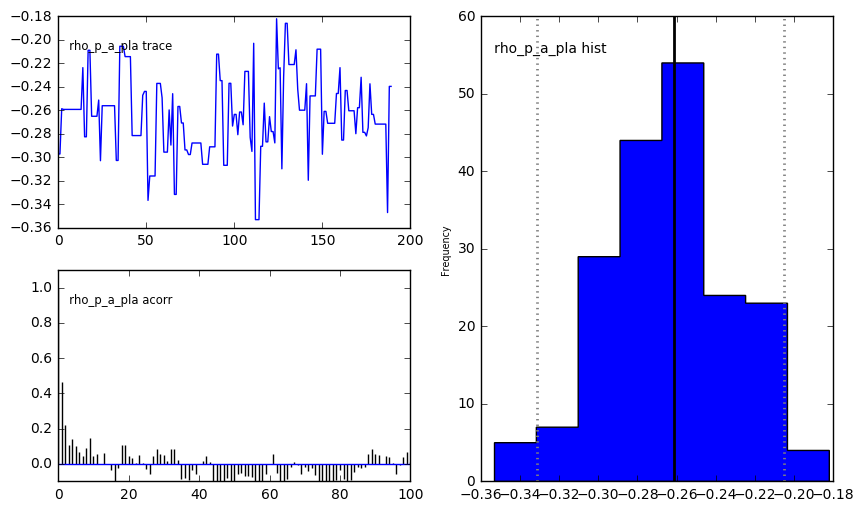

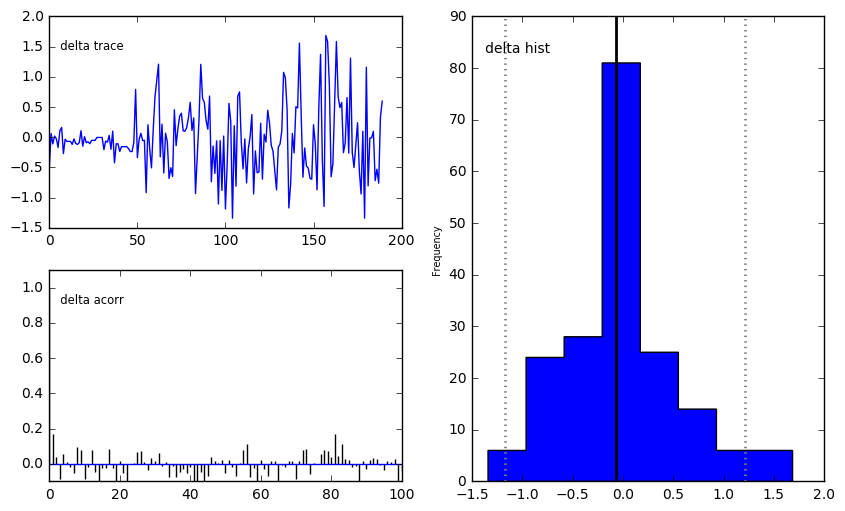

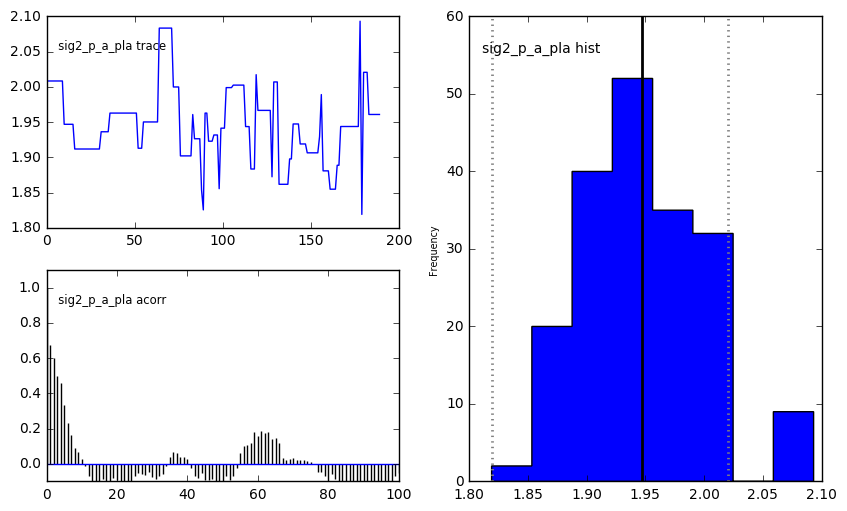

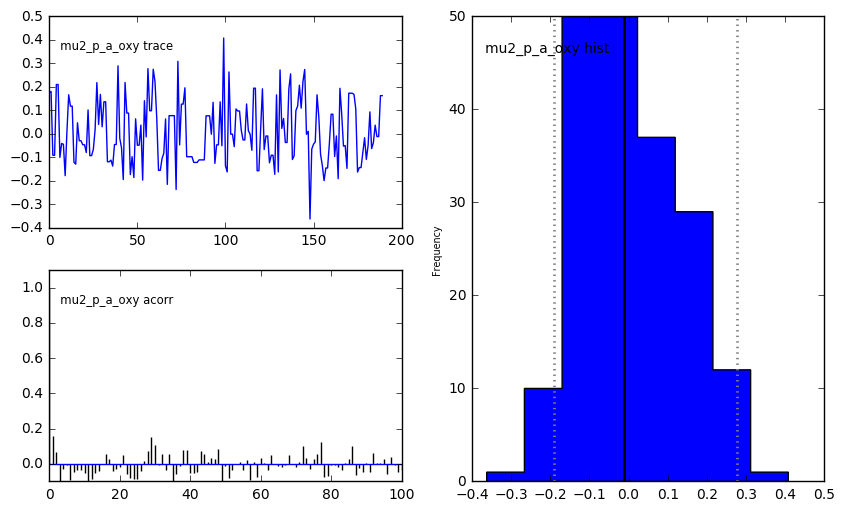

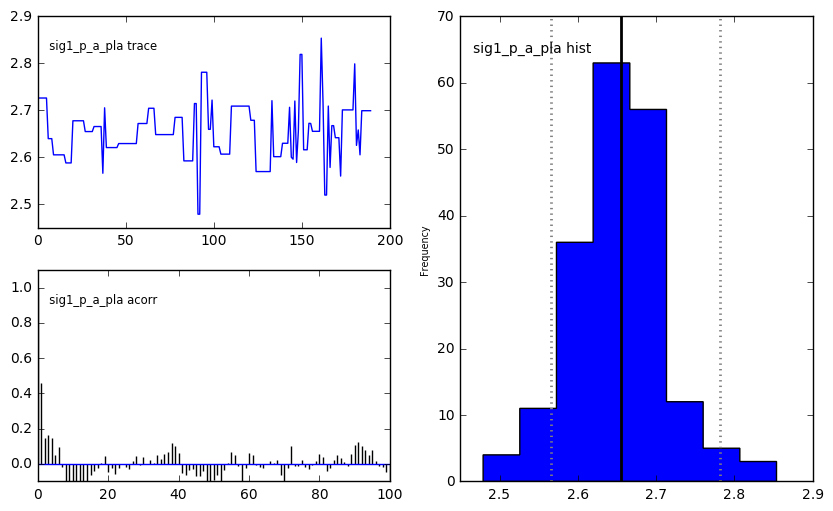

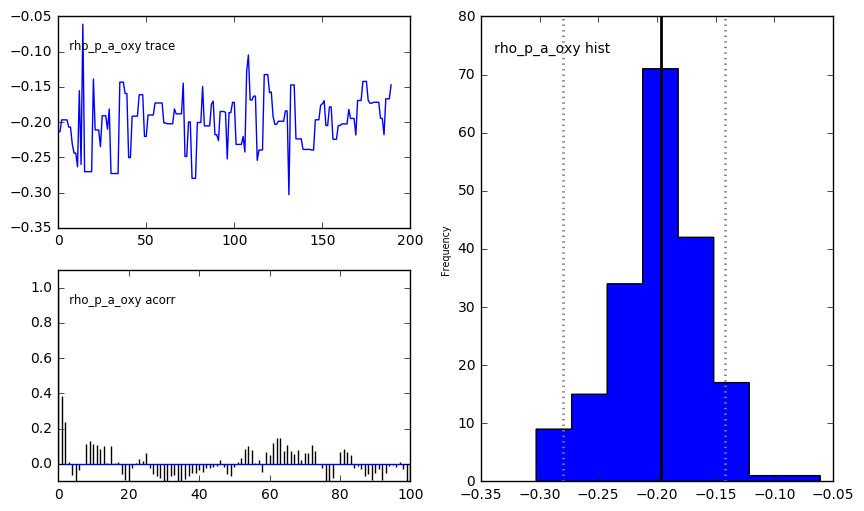

In [77]:
plot(m_p_a_pla)